## Observations and Insights 

In [110]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
from scipy.stats import linregress

# Study data files
mouse_path = "data/Mouse_metadata.csv"
study_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_path = pd.read_csv(mouse_path)
study_path = pd.read_csv(study_path)

# Combine the data into a single dataset
mouse_study =pd.merge(mouse_path,study_path, how="outer", on="Mouse ID")
# Display the data table for preview
mouse_study.head(30)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [111]:
# Checking the number of mice.
num_mice= mouse_study.loc[:,["Mouse ID"]]
mice_count=num_mice.count()[0]
print(mice_count)



1893


In [112]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes_df = mouse_study[mouse_study.duplicated(['Mouse ID','Timepoint'],keep=False)]
#trial_df.count()
#dupes_df.count()
dupes_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [113]:
# Optional: Get all the data for the duplicate mouse ID. 

dropped_df = mouse_study.loc[mouse_study['Mouse ID'] == 'm601']
dropped_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1
35,m601,Capomulin,Male,22,17,25,33.118756,1
36,m601,Capomulin,Male,22,17,30,31.758275,1
37,m601,Capomulin,Male,22,17,35,30.834357,1
38,m601,Capomulin,Male,22,17,40,31.378045,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


In [114]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
num_mice_cleaned = mouse_study.drop_duplicates('Mouse ID')
#clean_mouse_df= pd.DataFrame(mouse_study).drop_duplicates("Mouse ID")
num_mice_cleaned.head(10)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
50,s508,Ramicane,Male,1,17,0,45.0,0
60,f966,Capomulin,Male,16,17,0,45.0,0
65,m546,Ramicane,Male,18,16,0,45.0,0
75,z578,Ramicane,Male,11,16,0,45.0,0
85,j913,Ramicane,Female,4,17,0,45.0,0


In [115]:
# Checking the number of mice in the clean DataFrame.

num_mice= mouse_study.loc[:,["Mouse ID"]].drop_duplicates()
mice_count=num_mice.count()[0]
print(mice_count)


249


## Summary Statistics

In [116]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_of_stats = mouse_study.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 


summary_of_stats = num_mice_cleaned[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen')['Tumor Volume (mm3)']
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
dr_mean = summary_of_stats['Tumor Volume (mm3)'].mean()
dr_median = summary_of_stats['Tumor Volume (mm3)'].median()
dr_var = summary_of_stats['Tumor Volume (mm3)'].var()
dr_stdr = summary_of_stats['Tumor Volume (mm3)'].std()
dr_SEM= summary_of_stats['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_of_dr = pd.DataFrame({'Mean': dr_mean,'Median': dr_median, 'Varience': dr_var, 'Standard Deviation': dr_stdr,'SEM': dr_SEM})


# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_data = mouse_study.groupby(["Drug Regimen", "Timepoint"])
mean_tumor_data = group_data["Tumor Volume (mm3)"].mean()
mean_tumor_data.head()

# Convert to DataFrame
tumor_response_data=pd.DataFrame(mean_tumor_data).reset_index()
# Preview DataFrame
tumor_response_data.head(71)


IndexError: Column(s) Tumor Volume (mm3) already selected

In [131]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_of_dr.head()
# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Varience,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

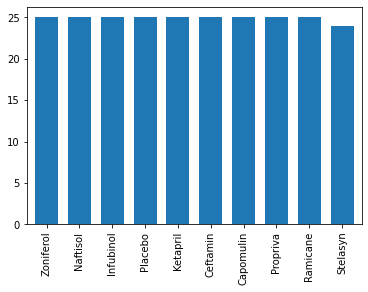

In [135]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#NOTE: when I use 'mouse_study Df I results, when i use num_mice--drop duplicates' I get the same all across 

bar_plot = num_mice_cleaned['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)

<BarContainer object of 249 artists>

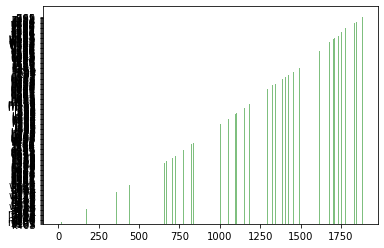

In [144]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot
plt.bar( num_mice_cleaned.index, num_mice_cleaned['Mouse ID'], color='g', alpha=0.5, align="center")

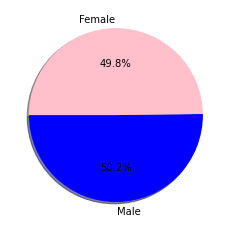

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
MvF= num_mice_cleaned['Sex'].value_counts()

#print(gender_stat)
labels = ["Male","Female"]
sizes = [125,124]
colors = ["blue", "pink"]
explode = (0,0)
plt.pie(sizes, explode=explode, labels=labels,colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)



plt.show()

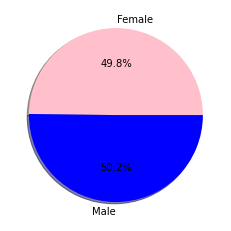

In [121]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
FvM= num_mice_cleaned['Sex'].value_counts()

#print(gender_stat)
labels = ["Female","Male"]
sizes = [124,125]
colors = ["pink","blue"]
explode = (0,0)
plt.pie(sizes, explode=explode, labels=labels,colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)



plt.show()

## Quartiles, Outliers and Boxplots

In [122]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens_df = num_mice_cleaned.loc[num_mice_cleaned['Drug Regimen'].isin([ 'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
regimens_df.head

# Start by getting the last (greatest) timepoint for each mouse
timepoints_df = regimens_df.groupby('Mouse ID').max()['Timepoint']
timepoints_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(regimens_df, timepoints_df, on=['Mouse ID', 'Timepoint'])
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,s185,Capomulin,Female,3,17,0,45.0,0
2,x401,Capomulin,Female,16,15,0,45.0,0
3,m601,Capomulin,Male,22,17,0,45.0,0
4,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,0,45.0,0
96,y163,Infubinol,Female,17,27,0,45.0,0
97,y769,Ceftamin,Female,6,27,0,45.0,0
98,y865,Ceftamin,Male,23,26,0,45.0,0


In [123]:
# Put treatments into a list for for loop (and later for plot labels)
regimens_list = [ 'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for reg in regimens_list:
    mice_df = merge_df.loc[merge_df['Drug Regimen']==reg]
    quartiles = mice_df['Tumor Volume (mm3)'].quantile([.25,.75])
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    iqr = quartiles[0.75] - quartiles[0.25]
    
    # add subset 
    tumor_vol.append(mice_df['Tumor Volume (mm3)'])
    
    # Determine outliers using upper and lower bounds
    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)

    print(mice_df.loc[mice_df['Tumor Volume (mm3)'] < lower_bound])
    print(mice_df.loc[mice_df['Tumor Volume (mm3)'] > upper_bound])

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Empty DataFrame
Columns: [Mouse ID

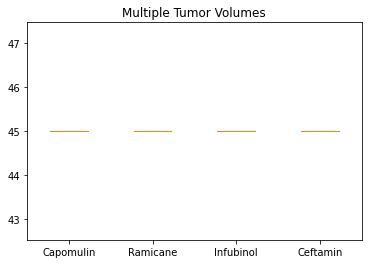

In [124]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = tumor_vol
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Tumor Volumes')
ax7.boxplot(data, labels=regimens_list)

plt.show()

## Line and Scatter Plots

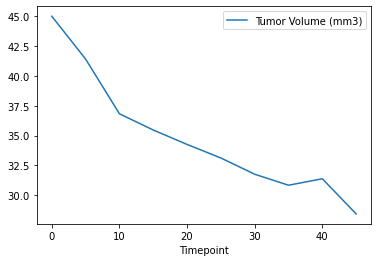

In [125]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouseid = 'm601'
line_Cap = mouse_study.loc[mouse_study['Mouse ID']==mouseid]
line_df.plot.line(x='Timepoint', y ='Tumor Volume (mm3)')
plt.show()

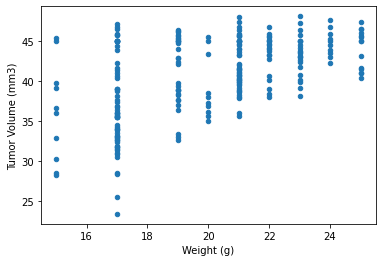

In [126]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_Cap = mouse_study.loc[mouse_study['Drug Regimen']=='Capomulin']
scatter_Cap.plot.scatter(x='Weight (g)', y ='Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

In [127]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = scatter_Cap['Weight (g)']
volume = scatter_Cap['Tumor Volume (mm3)']
correlation = st.pearsonr(weight, volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")



The correlation between both factors is 0.53


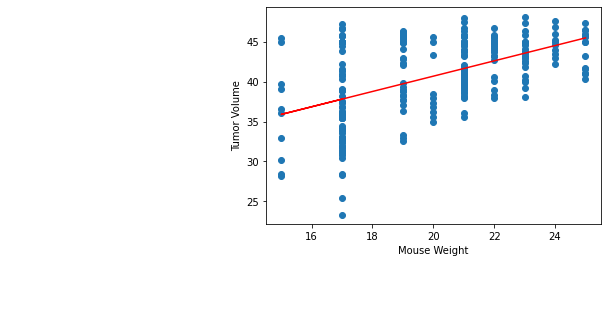

In [128]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.show()